In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
df_loc = pd.read_csv('Dataset/inmuebles-sample.csv')

In [7]:
# Definir las coordenadas aproximadas de la costa sur de Tenerife (en latitud y longitud)
costa_lat = 28.0700  # Latitud aproximada de la costa sur
costa_lon = -16.5700  # Longitud aproximada de la costa sur

# Función para calcular la distancia en km entre dos coordenadas geográficas
def calcular_distancia(lat1, lon1, lat2, lon2):
    # Convertir grados a radianes
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])

    # Fórmula de Haversine
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    
    # Radio de la Tierra en km
    r = 6371.0
    return r * c

# Calcular la distancia a la costa para cada propiedad
df_loc['distancia_a_costa'] = df_loc.apply(
    lambda row: calcular_distancia(row['latitude'], row['longitude'], costa_lat, costa_lon), axis=1
)


In [8]:
# Definir los rangos de distancia a la costa (en km)
bins = [0, 5, 10, 20, 50, 100]  # Rango de distancias (en km)
labels = ['0-5 km', '5-10 km', '10-20 km', '20-50 km', '50-100 km']

# Crear una nueva columna con el rango de distancia
df_loc['rango_distancia'] = pd.cut(df_loc['distancia_a_costa'], bins=bins, labels=labels, right=False)

# Calcular el precio promedio por rango de distancia
precio_por_distancia = df_loc.groupby('rango_distancia')['price'].mean()
print(precio_por_distancia)

rango_distancia
0-5 km       1170.833333
5-10 km       883.055556
10-20 km     1444.791667
20-50 km      889.742857
50-100 km    1168.428571
Name: price, dtype: float64


In [9]:
# Calcular las diferencias porcentuales entre cada rango
precio_por_distancia_pct = precio_por_distancia.pct_change() * 100
print(precio_por_distancia_pct)

rango_distancia
0-5 km             NaN
5-10 km     -24.578885
10-20 km     63.612771
20-50 km    -38.417221
50-100 km    31.322051
Name: price, dtype: float64


De 0-5 km a 5-10 km: Hay una disminución del 24.58% en los precios. Esto es interesante, ya que muestra que alejarse de la costa no siempre significa un precio más bajo.

De 5-10 km a 10-20 km: Hay un aumento del 63.61% en los precios, lo cual es un cambio significativo. Esto sugiere que en esta franja, a pesar de estar más lejos de la costa, las propiedades son más caras.

De 10-20 km a 20-50 km: Aquí hay una disminución del 38.42% en los precios, lo que sugiere que en esta franja las propiedades son considerablemente más baratas. Esto puede deberse a que estas zonas son menos accesibles o menos deseables.

De 20-50 km a 50-100 km: Hay un aumento del 31.32% en los precios. A pesar de estar más alejados de la costa, algunas zonas entre 50-100 km de la costa tienen precios comparables a los de las zonas cercanas a la costa, quizás por su proximidad al Teide. 

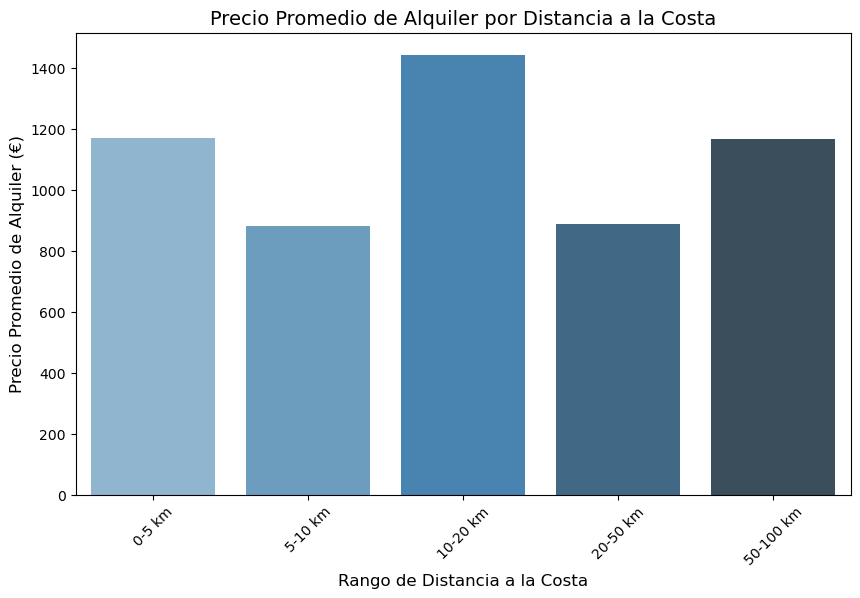

In [12]:
# Visualización de los precios promedio por distancia
plt.figure(figsize=(10, 6))
sns.barplot(x=precio_por_distancia.index, y=precio_por_distancia.values, palette='Blues_d')

plt.title('Precio Promedio de Alquiler por Distancia a la Costa', fontsize=14)
plt.xlabel('Rango de Distancia a la Costa', fontsize=12)
plt.ylabel('Precio Promedio de Alquiler (€)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

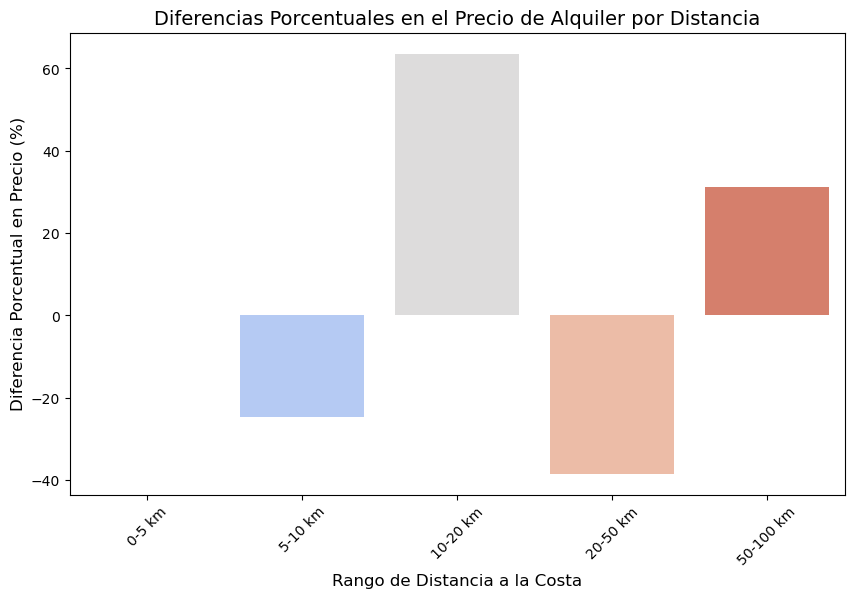

In [13]:
# Visualización de las diferencias porcentuales
plt.figure(figsize=(10, 6))
sns.barplot(x=precio_por_distancia_pct.index, y=precio_por_distancia_pct.values, palette='coolwarm')

plt.title('Diferencias Porcentuales en el Precio de Alquiler por Distancia', fontsize=14)
plt.xlabel('Rango de Distancia a la Costa', fontsize=12)
plt.ylabel('Diferencia Porcentual en Precio (%)', fontsize=12)
plt.xticks(rotation=45)
plt.show()

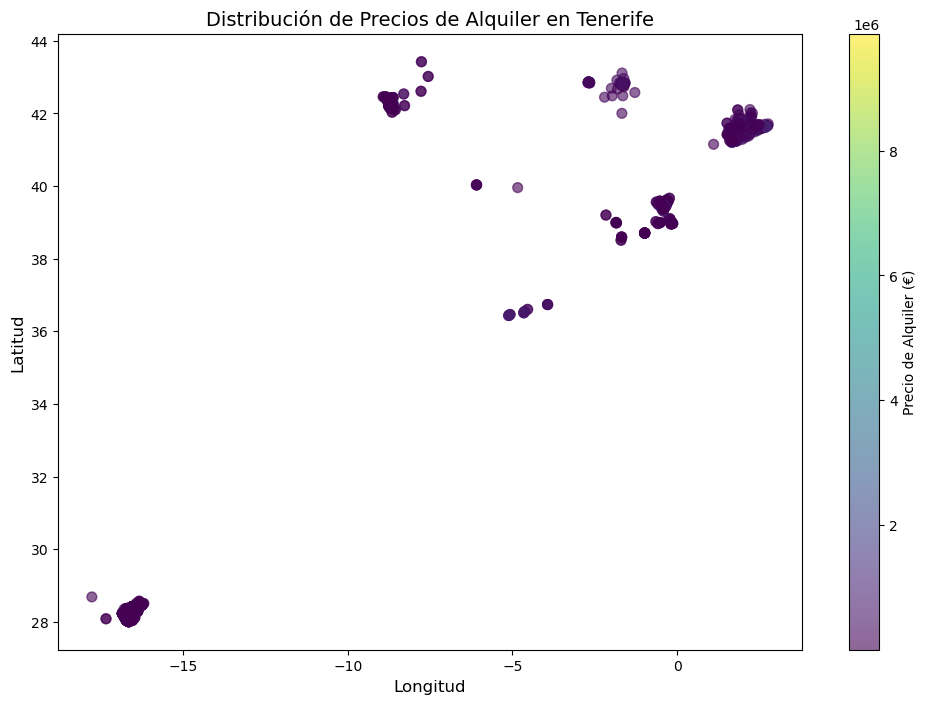

In [15]:
# Visualización básica de la distribución de precios en el mapa
plt.figure(figsize=(12, 8))

# Crear un scatter plot de los precios de alquiler según latitud y longitud
plt.scatter(df_loc['longitude'], df_loc['latitude'], c=df_loc['price'], cmap='viridis', s=50, alpha=0.6)

plt.colorbar(label='Precio de Alquiler (€)')
plt.title('Distribución de Precios de Alquiler en Tenerife', fontsize=14)
plt.xlabel('Longitud', fontsize=12)
plt.ylabel('Latitud', fontsize=12)
plt.show()


In [17]:
# Convertir los precios promedio y rangos de distancia en un DataFrame para usar con Plotly
df_precio_distancia = pd.DataFrame({
    'rango_distancia': precio_por_distancia.index,
    'precio_promedio': precio_por_distancia.values
})

# Crear un gráfico de barras interactivo
fig = px.bar(df_precio_distancia, x='rango_distancia', y='precio_promedio', title='Precio Promedio de Alquiler por Distancia a la Costa')
fig.update_layout(xaxis_title='Rango de Distancia a la Costa', yaxis_title='Precio Promedio de Alquiler (€)')

# Mostrar el gráfico
fig.show()

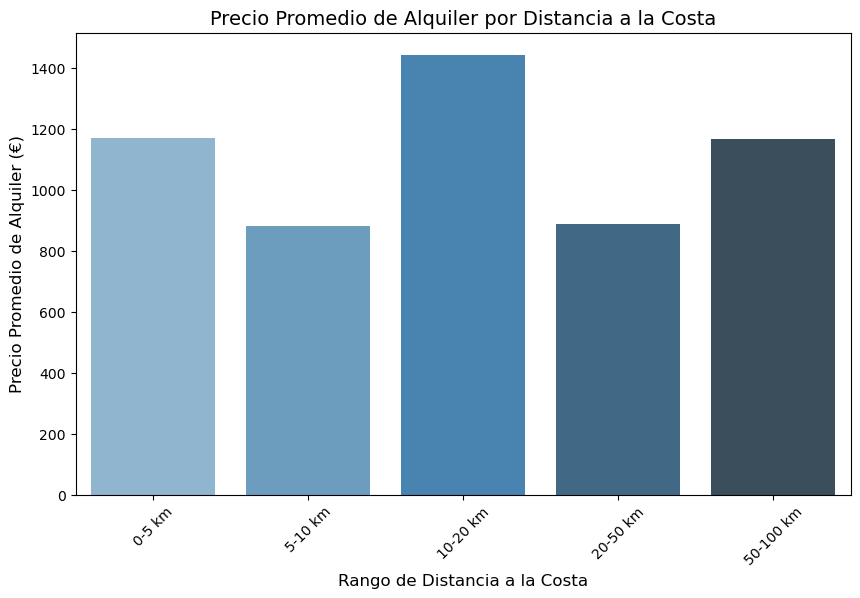

In [18]:
plt.figure(figsize=(10, 6))
sns.barplot(x=precio_por_distancia.index, y=precio_por_distancia.values, palette='Blues_d')
plt.title('Precio Promedio de Alquiler por Distancia a la Costa', fontsize=14)
plt.xlabel('Rango de Distancia a la Costa', fontsize=12)
plt.ylabel('Precio Promedio de Alquiler (€)', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('precio_por_distancia.png')  # Guardar el gráfico como una imagen
